# WeRateDogs Twitter Analysis

This report analyzes the Twitter archive of the user [@dog_rates](https://twitter.com/dog_rates), also known as WeRateDogs. The Twitter user rates other peoples' dogs and provides humorous content about them.

The Twitter archive data is being used here to practice data wrangling techniques to create analyses and visualizations about the data.

## Import Libraries

In [30]:
import pandas as pd
import numpy as np
import math
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

%matplotlib inline

# Data Wrangling

## Gather Data

In [3]:
# Load Twitter archive CSV into dataframe
tweets = pd.read_csv('twitter-archive-enhanced.csv')

In [27]:
# Download image predictions file from Udacity and save
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [4]:
# Load image predictions file into dataframe
images = pd.read_csv('image-predictions.tsv', sep='\t')

In [28]:
# Connect to Twitter API
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# Query Twitter API for additional tweet data
with open('tweet_json.txt', mode='a') as f:
    for tweet_id in tweets.tweet_id:
        try:
            print(tweet_id)
            tweet = api.get_status(tweet_id, tweet_mode='extended')._json
            json.dump(tweet, f)
            f.write('\n')
        except Exception as e:
            print(str(tweet_id) + ': Error accessing tweet - the tweet may have been deleted.')

8.92421E+17
8.92421E+17: Error accessing tweet - the tweet may have been deleted.
8.92177E+17
8.92177E+17: Error accessing tweet - the tweet may have been deleted.
8.91815E+17
8.91815E+17: Error accessing tweet - the tweet may have been deleted.
8.9169E+17
8.9169E+17: Error accessing tweet - the tweet may have been deleted.
8.91328E+17
8.91328E+17: Error accessing tweet - the tweet may have been deleted.
8.91088E+17
8.91088E+17: Error accessing tweet - the tweet may have been deleted.
8.90972E+17
8.90972E+17: Error accessing tweet - the tweet may have been deleted.
8.90729E+17
8.90729E+17: Error accessing tweet - the tweet may have been deleted.
8.90609E+17
8.90609E+17: Error accessing tweet - the tweet may have been deleted.
8.9024E+17
8.9024E+17: Error accessing tweet - the tweet may have been deleted.
8.90007E+17
8.90007E+17: Error accessing tweet - the tweet may have been deleted.
8.89881E+17
8.89881E+17: Error accessing tweet - the tweet may have been deleted.
8.89665E+17
8.89665E

KeyboardInterrupt: 

In [5]:
# Create list of dictionaries to build line by line, then convert to dataframe
df_list = []
with open('tweet_json.txt', mode='r', encoding='utf-8') as f:
    for line in f:
        l = json.loads(line)
        tweet_id = l['id_str']
        retweet_count = l['retweet_count']
        favorite_count = l['favorite_count']
        
        df_list.append({'tweet_id': tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': favorite_count})

tweet_stats = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

## Assess Data

In [6]:
# Display full columns entries (non-truncated)
pd.set_option('display.max_colwidth', -1)

In [6]:
tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [7]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
tweet_stats

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8558,38696
1,892177421306343426,6291,33164
2,891815181378084864,4174,24963
3,891689557279858688,8681,42071
4,891327558926688256,9451,40225
5,891087950875897856,3125,20173
6,890971913173991426,2082,11817
7,890729181411237888,18984,65365
8,890609185150312448,4281,27723
9,890240255349198849,7447,31864


In [9]:
# Look at tweets with lowercase names
tweets[tweets.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024703037440/photo/1,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog

In [10]:
# Look at tweets with decimal ratings
decimal_rating = tweets.text.str.contains('\d+\.\d+/\d+')
tweets[decimal_rating]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


In [11]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
tweet_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id          2345 non-null object
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.0+ KB


In [14]:
tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


All of the rankings I've seen on WeRateDogs have had a denominator of 10. Above we can see that the min and max of the rating denominators are 0 and 170. Let's look closer at rating denominators not equal to 10.

In [15]:
# Tweets with rating denominators not equal to 10
tweets[tweets.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

In [16]:
tweets[tweets.text.str.contains('Bretagne')].tweet_id

784     775096608509886464
1068    740373189193256964
Name: tweet_id, dtype: int64

### Quality
`tweets`:
- Some of the tweets are retweets
- There is no image in some of the tweets
- Some names are recorded as 'None' when the text format is 'named xxxx' and 'name is xxxx'
- Name of dog in tweet_id '740373189193256964' is named 'Bretagne' not 'None' (the other tweet with 'Bretagne' is a rewtweet and will be deleted)
- The lowercase names are not actually names
- Ratings with decimals are interpreted incorrectly (e.g. 5/10 instead of 13.5/10)
- Many fractions interpreted as ratings instead of actual rating that comes later in tweet (960/00, 11/15/15, 24/7, 9/11, 4/20, 50/50, 7/11, 3 1/2)
- Missing names and missing dog stages represented as 'None'
- Erroneous data types for tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_user_id, retweeted_status_timestamp, dog stages

`images`:
- Erroneous data type for tweet_id


### Tidiness
- The variable 'dog_stage' in `tweets` is broken into 4 columns: 'doggo', 'floofer', 'pupper', and 'puppo'
- Retweet count and favorite count should be a part of `tweets` table

## Clean Data

In [7]:
# Make copies of dataframes
tweets_clean = tweets.copy()
images_clean = images.copy()
tweet_stats_clean = tweet_stats.copy()

__Some of the tweets are retweets__

### Define
Remove retweets from `tweets` table by checking if retweeted status id column is null, then remove retweet-related columns

### Code and Test

In [8]:
# Keep only tweets that have retweeted status id of null, then reset index
tweets_clean = tweets_clean[tweets_clean.retweeted_status_id.isnull()]
tweets_clean = tweets_clean.reset_index(drop=True)

In [19]:
# Check if any retweet columns have data
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [9]:
# Remove retweet columns
retweet_cols = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
tweets_clean = tweets_clean.drop(retweet_cols, axis=1)

In [23]:
# Check columns are removed
tweets_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

__There is no image in some of the tweets__

### Define
Remove tweets with no image by removing tweets with null in expanded url column

### Code

In [10]:
# Remove image-less tweets and then reset index
tweets_clean = tweets_clean[tweets_clean.expanded_urls.notnull()]
tweets_clean = tweets_clean.reset_index(drop=True)

### Test

In [25]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 14 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null object
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 231.6+ KB


__The variable 'dog_stage' in `tweets` is broken into 4 columns: 'doggo', 'floofer', 'pupper', and 'puppo'__

### Define
Extract dog stage from tweet text and create dog stage column with results. Then, delete old dog stage columns ('doggo', 'floofer', 'pupper', and 'puppo').

For tweets that mention a dog stage more than once, the first mention of dog stage will be documented in dog_stage. Whether or not a dog stage was mentioned more than once (even if it was the same stage) will be documented as True or False in additional_dog_stage. The rationale is that mentioning a dog stage more than once, even if it is the same stage, emphasizes the 'cuteness' of the dog staging more than one mention.

### Code

In [11]:
# Create pandas Series of lists with dog stages mentioned in tweet text
dog_stages = pd.Series(tweets_clean.text.str.findall(r'([Dd]oggo|[Ff]loofer|[Pp]upper|[Pp]uppo)'))

# Create dog stage column with first mention of dog stage in tweet
tweets_clean['dog_stage'] = dog_stages.str[0].str.lower()

# Create additional dog stage column
tweets_clean['additional_dog_stage'] = dog_stages.str.len() > 1

In [12]:
# Delete old dog stage columns
dog_stage_cols = ['doggo', 'floofer', 'pupper', 'puppo']
tweets_clean = tweets_clean.drop(dog_stage_cols, axis=1)

### Test

In [28]:
# Confirm old dog stage columns removed and new ones added
tweets_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'additional_dog_stage'],
      dtype='object')

In [36]:
# Check a sample of tweets to make sure dog stage column values created correctly
tweets_clean[['text', 'dog_stage', 'additional_dog_stage']].sample(20)

,text,dog_stage,additional_dog_stage
722,This is one of the most inspirational stories I've ever come across. I have no words. 14/10 for both doggo and owner https://t.co/I5ld3eKD5k,doggo,False
1767,"This is Jackie. She was all ready to go out, but her friends just cancelled on her. 10/10 hang in there Jackie https://t.co/rVfi6CCidK",NaN,False
191,Meet Daisy. She's been pup for adoption for months now but hasn't gotten any applications. 11/10 let's change that\n\nhttps://t.co/Jlb9L0m3J0 https://t.co/Eh7fGFuy6r,NaN,False
399,This is Mary. She's desperately trying to recreate her Coachella experience. 12/10 downright h*ckin adorable https://t.co/BAJrfPvtux,NaN,False
283,"Meet Samson. He's absolute fluffy perfection. Easily 13/10, but he needs your help. Click the link to find out more\n\nhttps://t.co/z82hCtwhpn https://t.co/KoWrMkbMbW",NaN,False
21,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,False
160,This is Arya. She can barely contain her excitement for more peanut butter. Also patriotic af. 13/10 https://t.co/AL4Ahm1Rm5,NaN,False
1268,This is Milo. He doesn't understand your fancy human gestures. Will lick instead. 10/10 can't faze this pupper https://t.co/OhodPIDOpW,pupper,False
564,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",pupper,True
1886,Meet Scooter. He's ready for his first day of middle school. Remarkable tongue. 12/10 https://t.co/1DJfHmfBQN,NaN,False


__Retweet count and favorite count should be a part of `tweets` table__

### Define
Merge `tweet_stats_clean` table with `tweets_clean` table on tweet_id

### Code

In [13]:
# Change tweet id data type to string in tweets_clean so data types match
tweets_clean.tweet_id = tweets_clean.tweet_id.astype(str)

# Merge tables
tweets_clean = tweets_clean.merge(tweet_stats_clean, how='left', on='tweet_id')

### Test

In [38]:
# Check columns merged into tweets_clean
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 14 columns):
tweet_id                 2117 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null object
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
dog_stage                373 non-null object
additional_dog_stage     2117 non-null bool
retweet_count            2117 non-null int64
favorite_count           2117 non-null int64
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 233.6+ KB


In [39]:
tweets_clean[['retweet_count', 'favorite_count']].sample(5)

,retweet_count,favorite_count
212,3902,16125
470,16116,35328
604,5277,16867
318,1933,10850
1016,810,3001


__Some names are recorded as 'None' when the text format is 'named xxxx' and 'name is xxxx'__

### Define
Search tweet text for 'named xxxx' and 'name is xxxx' using RegEx and capture names to record in name column

### Code

In [14]:
# Create RegEx to search for 'named' or 'name is', with and without RegEx group to extract name
named_name_is = r'(?:named |name is )([A-Z][A-Za-z]+)'
named_name_is_no_group = r'(?:named |name is )[A-Z][A-Za-z]+'

# Get list of indexes for tweets with named or name is
tweets_named_name_is_index = tweets_clean.loc[tweets_clean.text.str.contains(named_name_is_no_group)].index

# Loop through indexes and extract name in each tweet to enter into dataframe
for index in tweets_named_name_is_index:
    row = tweets_clean.index == index
    tweets_clean.loc[row, 'name'] = tweets_clean.loc[row, 'text'].str.extract(named_name_is, expand=False)

### Test

In [41]:
# Check rows that contain 'named' or 'name is'
tweets_clean.loc[tweets_named_name_is_index, 'name']

32      Howard    
141     Zoey      
659     Zoey      
1453    Thea      
1508    Sabertooth
1624    Wylie     
1722    Kip       
1801    Jacob     
1832    Rufus     
1882    Spork     
1891    Cherokee  
1894    Hemry     
1912    Alphred   
1926    Alfredo   
1931    Zeus      
1955    Leroi     
1968    Berta     
1982    Chuk      
1991    Guss      
1999    Alfonso   
2013    Cheryl    
2019    Jessiga   
2026    Klint     
2029    Big       
2031    Tickles   
2035    Kohl      
2049    Daryl     
2065    Pepe      
2072    Octaviath 
2074    Rocky     
2075    Johm      
Name: name, dtype: object

__The lowercase names are not actually names__

### Define
Remove lowercase names from name column in `tweets_clean` table

### Code

In [15]:
# Replace lowercase names with NaN
tweets_clean.name = tweets_clean.name.replace(r'^[a-z]+$', 'None', regex=True)

### Test

In [43]:
# Make sure no names are all lowercase
len(tweets_clean[tweets_clean.name.str.islower()])

0

__Name of dog in tweet_id '740373189193256964' is named 'Bretagne' not 'None'__

__Missing names and missing dog stages represented as 'None'__

### Define
Correct name column for 'Bretagne' and change missing names from 'None' to NaN (dog stages already taken care of above)

### Code

In [16]:
# Fix Bretagne's name column
tweets_clean.loc[tweets_clean.tweet_id == '740373189193256964', 'name'] = 'Bretagne'

# Change missing names from 'None' to NaN
tweets_clean.name = tweets_clean.name.replace('None', np.nan)

 ### Test

In [45]:
# Make sure Bretagne name is entered
tweets_clean.loc[tweets_clean.name == 'Bretagne', 'name']

857    Bretagne
Name: name, dtype: object

In [46]:
# Check for 'None' values in name column
len(tweets_clean[tweets_clean.name == 'None'])

0

In [71]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 14 columns):
tweet_id                 2117 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null object
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     1422 non-null object
dog_stage                373 non-null object
additional_dog_stage     2117 non-null bool
retweet_count            2117 non-null int64
favorite_count           2117 non-null int64
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 233.6+ KB


__Ratings with decimals are interpreted incorrectly (e.g. 5/10 instead of 13.5/10)__

### Define
Search tweet text for decimal ratings using RegEx and record correct rating

### Code

In [17]:
# RegEx for decimal ratings (copied from Assess section above)
decimal_rating_group = r'(\d+\.\d+)/\d+'
decimal_rating_no_group = r'\d+\.\d+/\d+'

# List of indexes for tweets with decimal rating
decimal_rating_indexes = tweets_clean.loc[tweets_clean.text.str.contains(decimal_rating_no_group)].index

# Loop through indexes and enter correct ratings
for index in decimal_rating_indexes:
    row = tweets_clean.index == index
    tweets_clean.loc[row, 'rating_numerator'] = tweets_clean.loc[row, 'text'].str.extract(
        decimal_rating_group, expand=False).astype(float)

### Test

In [73]:
tweets_clean.rating_numerator.value_counts()

12.00      489
10.00      436
11.00      417
13.00      295
9.00       154
8.00       98 
7.00       52 
14.00      40 
5.00       33 
6.00       32 
3.00       19 
4.00       16 
2.00       9  
1.00       5  
0.00       2  
13.50      1  
24.00      1  
84.00      1  
143.00     1  
50.00      1  
420.00     1  
60.00      1  
44.00      1  
144.00     1  
88.00      1  
11.26      1  
11.27      1  
121.00     1  
9.75       1  
99.00      1  
204.00     1  
45.00      1  
165.00     1  
1776.00    1  
80.00      1  
Name: rating_numerator, dtype: int64

__Many fractions interpreted as ratings instead of actual rating that comes later in tweet (960/00, 11/15/15, 24/7, 9/11, 4/20, 50/50, 7/11, 3 1/2)__

### Define
Use RegEx to replace rating numerators and denominators for tweets that contain known fractions above

### Code

In [18]:
# RegEx for incorrect ratings, with RegEx groups to extract correct numerator and denominator
incorrect_ratings = r'(?:960/00|11/15/15|24/7|9/11|4/20|50/50|7/11|3 1/2).+?'
numerator = incorrect_ratings + '(\d+)/\d+'
denominator = incorrect_ratings + '\d+/(\d+)'

# List of indexes for tweets with incorrect fraction as rating
incorrect_rating_indexes = tweets_clean.loc[tweets_clean.text.str.contains(incorrect_ratings)].index

# Loop through indexes and enter correct ratings
for index in incorrect_rating_indexes:
    row = tweets_clean.index == index
    tweets_clean.loc[row, 'rating_numerator'] = tweets_clean.loc[row, 'text'].str.extract(
        numerator, expand=False).astype(float, errors='ignore')
    tweets_clean.loc[row, 'rating_denominator'] = tweets_clean.loc[row, 'text'].str.extract(
        denominator, expand=False).astype(float, errors='ignore')

In [19]:
# Remove tweet that now has no rating
tweets_clean = tweets_clean[tweets_clean.rating_numerator.notnull()]
tweets_clean = tweets_clean.reset_index(drop=True)

### Test

In [79]:
tweets_clean.rating_denominator.value_counts()

10.0     2104
50.0     2   
80.0     2   
150.0    1   
110.0    1   
130.0    1   
70.0     1   
170.0    1   
120.0    1   
40.0     1   
90.0     1   
Name: rating_denominator, dtype: int64

__Erroneous data types for tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_user_id, retweeted_status_timestamp, dog stages__

### Define
- Change tweet_id to string in `images_clean` table (already taken care of in `tweets_clean` table)
- Change in_reply_to columns to string
- Change timestamp column to datetime
- Retweeted columns have been dropped so they are taken care of
- Change dog stage column to category data type

### Code

In [20]:
# tweet_id to string in images_clean
images_clean.tweet_id = images_clean.tweet_id.astype(str)

# in reply to columns to string
tweets_clean.in_reply_to_status_id = tweets_clean.in_reply_to_status_id.where(
    tweets_clean.in_reply_to_status_id.isnull(), tweets_clean.in_reply_to_status_id.astype(str))
tweets_clean.in_reply_to_user_id = tweets_clean.in_reply_to_user_id.where(
    tweets_clean.in_reply_to_user_id.isnull(), tweets_clean.in_reply_to_user_id.astype(str))

# timestamp to datetime
tweets_clean.timestamp = pd.to_datetime(tweets_clean.timestamp, infer_datetime_format=True)

# dog_stage column to category
tweets_clean.dog_stage = tweets_clean.dog_stage.astype('category')

### Test

In [54]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [81]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116 entries, 0 to 2115
Data columns (total 14 columns):
tweet_id                 2116 non-null object
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                2116 non-null datetime64[ns]
source                   2116 non-null object
text                     2116 non-null object
expanded_urls            2116 non-null object
rating_numerator         2116 non-null float64
rating_denominator       2116 non-null float64
name                     1421 non-null object
dog_stage                373 non-null category
additional_dog_stage     2116 non-null bool
retweet_count            2116 non-null int64
favorite_count           2116 non-null int64
dtypes: bool(1), category(1), datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 202.8+ KB


In [82]:
tweets_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,additional_dog_stage,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,False,8558,38696
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,False,6291,33164
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,False,4174,24963
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,False,8681,42071
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,False,9451,40225


# Exploratory Data Analysis

For this analysis I am going to focus on the `tweets_clean` table from above. I am not interested in the following columns at this time and will therefore remove them:
- in_reply_to_user_id
- source
- expanded_urls

In [21]:
# Remove columns that will not be used
tweets_analysis = tweets_clean.drop(['in_reply_to_user_id', 'source', 'expanded_urls'], axis=1)

In [113]:
tweets_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116 entries, 0 to 2115
Data columns (total 11 columns):
tweet_id                 2116 non-null object
in_reply_to_status_id    23 non-null object
timestamp                2116 non-null datetime64[ns]
text                     2116 non-null object
rating_numerator         2116 non-null float64
rating_denominator       2116 non-null float64
name                     1421 non-null object
dog_stage                373 non-null category
additional_dog_stage     2116 non-null bool
retweet_count            2116 non-null int64
favorite_count           2116 non-null int64
dtypes: bool(1), category(1), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 153.2+ KB


In [115]:
tweets_analysis.shape

(2116, 11)

The dataset being analyzed contains 11 variables and 2116 tweets.

## Univariate Analysis

### Reply Tweets and Dog Names

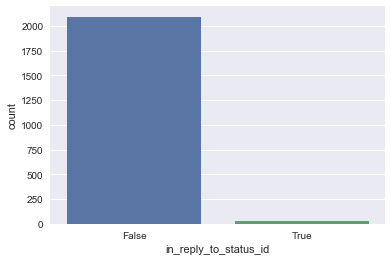

In [22]:
# Countplot of reply vs non-reply tweets
ax = sns.countplot(x=tweets_analysis.in_reply_to_status_id.notnull())

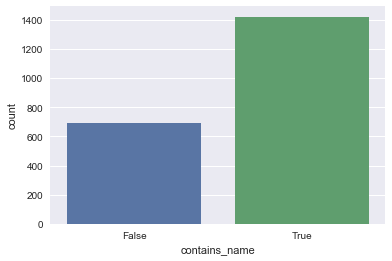

In [185]:
# Countplot of tweets with dog name vs without dog name
tweets_analysis['contains_name'] = tweets_analysis.name.notnull()
ax = sns.countplot(x=tweets_analysis.contains_name)

In [22]:
# Most common dog names
tweets_analysis.name.value_counts()[0:10]

Charlie    11
Lucy       11
Cooper     10
Oliver     10
Penny      9 
Tucker     9 
Lola       8 
Winston    8 
Sadie      8 
Toby       7 
Name: name, dtype: int64

Only a small portion of the tweets are replies, while about two-thirds of the tweets contain a dog's name. The most common dog names are also displayed above.

### Tweet Text Length

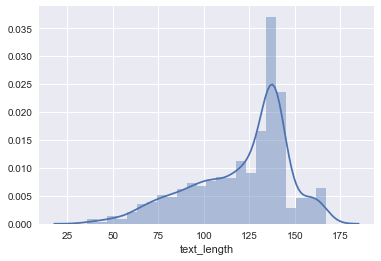

In [186]:
# Histogram of tweet text length
tweets_analysis['text_length'] = tweets_analysis.text.str.len()
ax = sns.distplot(tweets_analysis.text_length)

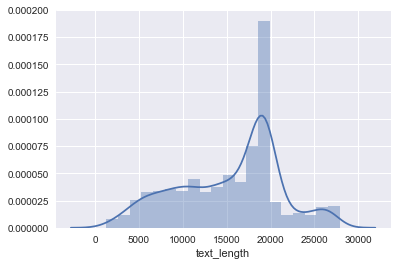

In [187]:
# Histogram of tweet text length squared
ax = sns.distplot(tweets_analysis.text_length**2)

In [188]:
tweets_analysis.text_length.describe()

count    2116.000000
mean     121.006616 
std      26.383424  
min      36.000000  
25%      103.000000 
50%      130.000000 
75%      139.000000 
max      167.000000 
Name: text_length, dtype: float64

In [189]:
tweets_analysis[tweets_analysis.text_length == 36]

,tweet_id,in_reply_to_status_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,additional_dog_stage,retweet_count,favorite_count,rating_percent,contains_name,text_length
2015,667801013445750784,NaN,2015-11-20 20:25:43,OMIGOD 12/10 https://t.co/SVMF4Frf1w,12.0,10.0,NaN,NaN,False,98,338,120.0,False,36


In [190]:
tweets_analysis[tweets_analysis.text_length == 167]

,tweet_id,in_reply_to_status_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,additional_dog_stage,retweet_count,favorite_count,rating_percent,contains_name,text_length
213,842765311967449089,NaN,2017-03-17 15:51:22,Meet Indie. She's not a fan of baths but she's definitely a fan of hide &amp; seek. 12/10 click the link to help Indie\n\nhttps://t.co/fvGkIuAlFK https://t.co/kiCFtmJd7l,12.0,10.0,Indie,NaN,False,1389,7150,120.0,True,167
361,817536400337801217,NaN,2017-01-07 01:00:41,"Say hello to Eugene &amp; Patti Melt. No matter how dysfunctional they get, they will never top their owners. Both 12/10 would pet at same time https://t.co/jQUdvtdYMu",12.0,10.0,Eugene,NaN,False,3396,12794,120.0,True,167


Most tweets are between about 130-140 characters in length, and the distribution is negatively skewed. Squaring the tweet text length does not make the distribution more normal. As can be seen above, the shortest tweet is 36 characters and the longest is 167 characters. Twitter had a maximum character count of 140 until the end of 2017, so I looked closer at the text for both the min and max lengths. The character counts in the data here include the link to the tweet and character references for symbols (e.g. &amp; instead of &), making all of the tweets about 20-30 characters longer than they would be on Twitter.

The shortest tweet has much lower retweet and favorite counts than the longest tweets. I'm interested to see later if tweet length correlates with retweet and favorite counts. The longer tweets also contain dog names and were tweeted over a year after the shortest tweet. Retweet and favorite counts may actually correlate with these variables.

### Timestamp

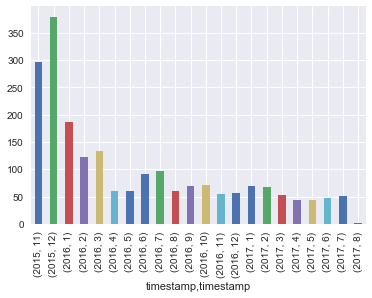

In [106]:
ax = tweets_analysis.groupby([tweets_analysis.timestamp.dt.year,
                         tweets_analysis.timestamp.dt.month]).timestamp.count().plot(kind='bar')

The WeRateDogs account appears to have tweeted most often when the account was first created at the end of 2015. This makes sense as the account was likely created due to someone having a lot of dog pictures and ideas for tweets before creating the account. The person running the account also likely wanted to gain a lot of followers and create a Twitter presence at the start. There's always a lot of excitement when something is new, and I think the number of tweets across time shows us that. Since April 2016 the number of tweets each month has been fairly consistent and seems to have leveled off around 50-75 tweets per month. 

### Dog Stages

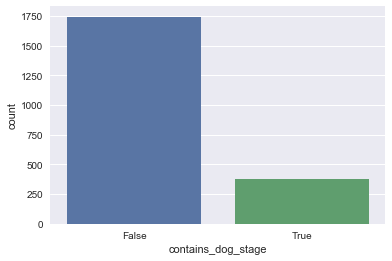

In [193]:
# Plot of tweets with or without dog stages included
tweets_analysis['contains_dog_stage'] = tweets_analysis.dog_stage.notnull()
ax = sns.countplot(tweets_analysis.contains_dog_stage)

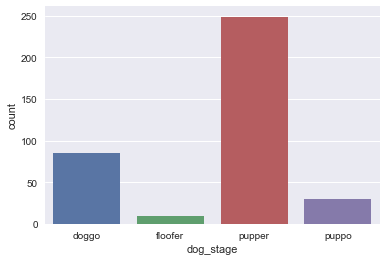

In [107]:
# Bar plot of dog stages
ax = sns.countplot(tweets_analysis.dog_stage)

False    2093
True     23  
Name: additional_dog_stage, dtype: int64


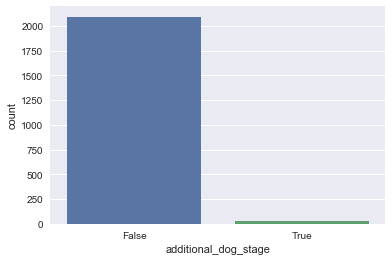

In [111]:
# Plot of additional dog stage included or not
ax = sns.countplot(tweets_analysis.additional_dog_stage)
print(tweets_analysis.additional_dog_stage.value_counts())

Most tweets do not contain a dog stage, and only 23 out of the 2116 tweets contain an additional dog stage. Of the tweets that do contain a dog stage, 'pupper' is the most common, followed by 'doggo', 'puppo', and 'floofer'. As mentioned above, I want to look further into the effect the dog stage has on retweet and favorite counts.

In [21]:
tweets_analysis.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,2116.000000,2116.000000,2116.000000,2116.000000
mean,12.192713,10.482042,2766.555293,8864.030246
std,40.248600,7.049582,4690.957530,12462.361246
min,0.000000,10.000000,13.000000,80.000000
25%,10.000000,10.000000,616.000000,1990.000000
50%,11.000000,10.000000,1348.000000,4073.000000
75%,12.000000,10.000000,3168.250000,11131.500000
max,1776.000000,170.000000,77131.000000,142988.000000


### Rating Numerators and Denominators

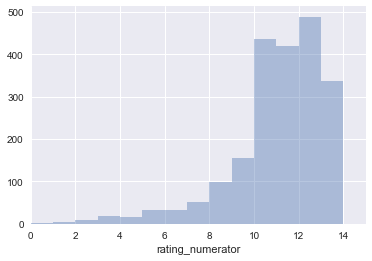

In [91]:
# Rating numerator distribution with top 1% of data removed (added 1 to include values equal to 99th percentile)
rn_quantile_99 = tweets_analysis.rating_numerator.quantile(0.99) + 1
ax = sns.distplot(tweets_analysis.rating_numerator, bins=range(0, math.ceil(rn_quantile_99)), kde=False)
plt.xlim(0, rn_quantile_99)
plt.show()

In [92]:
# Tweets with rating numerators greater than 99th quantile
tweets_analysis[tweets_analysis.rating_numerator > rn_quantile_99]

,tweet_id,in_reply_to_status_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,additional_dog_stage,retweet_count,favorite_count
341,820690176645140481,NaN,2017-01-15 17:52:40,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0,NaN,NaN,False,3598,13206
701,758467244762497024,NaN,2016-07-28 01:00:57,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0,NaN,NaN,False,2464,5178
771,749981277374128128,NaN,2016-07-04 15:00:45,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10.0,Atticus,NaN,False,2702,5502
907,731156023742988288,NaN,2016-05-13 16:15:54,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0,NaN,doggo,False,1388,4085
1015,713900603437621249,NaN,2016-03-27 01:29:02,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0,NaN,pupper,False,810,3001
1040,710658690886586372,NaN,2016-03-18 02:46:49,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0,NaN,pupper,False,615,2456
1060,709198395643068416,NaN,2016-03-14 02:04:08,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0,NaN,NaN,False,697,2567
1135,704054845121142784,NaN,2016-02-28 21:25:30,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0,NaN,pupper,False,1000,3121
1217,697463031882764288,NaN,2016-02-10 16:51:59,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0,NaN,NaN,False,1506,3643
1409,684225744407494656,6.84222868336e+17,2016-01-05 04:11:44,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0,NaN,pupper,False,232,1325


In [53]:
# Rating denominator value counts
tweets_analysis.rating_denominator.value_counts()

10.0     2104
50.0     2   
80.0     2   
150.0    1   
110.0    1   
130.0    1   
70.0     1   
170.0    1   
120.0    1   
40.0     1   
90.0     1   
Name: rating_denominator, dtype: int64

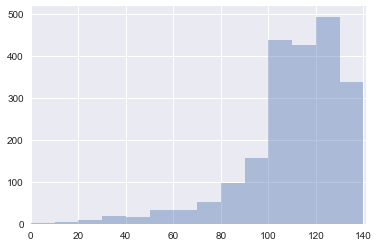

In [181]:
# Histogram of (numerator/denominator)*100 (AKA rating as a percentage) with top 1% removed
tweets_analysis['rating_percent'] = (tweets_analysis.rating_numerator/tweets_analysis.rating_denominator)*100
rp_quantile_99 = tweets_analysis.rating_percent.quantile(0.99) + 1
ax = sns.distplot(tweets_analysis.rating_percent,
                  bins=range(0,math.ceil(rp_quantile_99),10),
                  kde=False)
plt.xlim(0,math.ceil(rp_quantile_99))
plt.show()

In [197]:
# Tweets with rating percentage greater than 99th quantile
tweets_analysis[tweets_analysis.rating_percent > rp_quantile_99]

,tweet_id,in_reply_to_status_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,additional_dog_stage,retweet_count,favorite_count,rating_percent,contains_name,text_length,contains_dog_stage
771,749981277374128128,NaN,2016-07-04 15:00:45,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10.0,Atticus,NaN,False,2702,5502,17760.0,True,78,False
1839,670842764863651840,NaN,2015-11-29 05:52:33,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420.0,10.0,NaN,NaN,False,9252,25429,4200.0,False,81,False


The distribution of rating numerators is negatively skewed, with most rating numerators between 10 and 14. A lot of the tweets with rating numerators higher than the 99th quantile also have higher rating denominators. To account for the different values of denominators, I created a new variable (rating percent) for each tweet by taking the rating (numerator/ denominator) * 100. I then plotted this and found a similar distribution to the rating numerator distibution, but was able to include almost all the data while still removing the top 1% of values. I'm interested to see later if the rating percent affects retweet or favorite counts for the tweets.

### Retweet and Favorite Counts

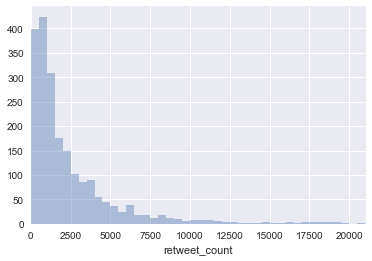

In [124]:
# Distribution of retweet count with top 1% of data removed
rc_quantile_99 = tweets_analysis.retweet_count.quantile(0.99) + 1
ax = sns.distplot(tweets_analysis.retweet_count, 
                  bins=range(0, math.ceil(rc_quantile_99), 500),
                  kde=False)
plt.xlim(0, rc_quantile_99)
plt.show()

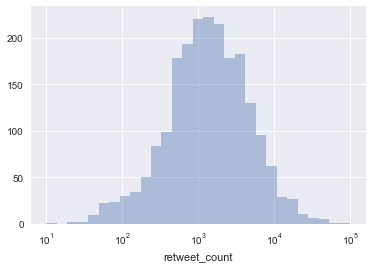

In [172]:
# Distibution of log(retweet_count)
ax = sns.distplot(tweets_analysis.retweet_count,
                  bins=np.logspace(1, 5, num=30),
                  kde=False)
ax.set_xscale('log')

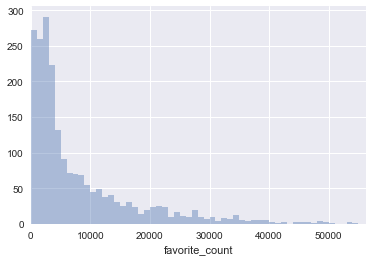

In [139]:
# Distribution of favorite count with top 1% of data removed
fc_quantile_99 = tweets_analysis.favorite_count.quantile(0.99) + 1
ax = sns.distplot(tweets_analysis.favorite_count,
                  bins=range(0, math.ceil(fc_quantile_99), 1000),
                  kde=False)
plt.xlim(0, fc_quantile_99)
plt.show()

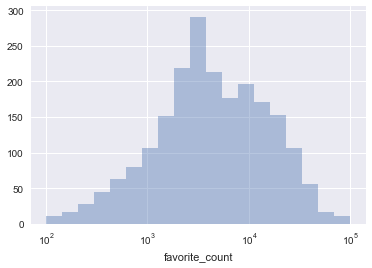

In [177]:
# Distribution of log(favorite_count)
ax = sns.distplot(tweets_analysis.favorite_count,
                  bins=np.logspace(2, 5, num=20), kde=False)
ax.set_xscale('log')

The distributions of both retweet count and favorite count are positively skewed, but a log transformation results in a normal distibution for both variables. These variables are what I am most interested in exploring further as they are a good gauge of the popularity of a tweet. I assume that more popular tweets lead to a more followed and successful Twitter page, so I want to see which variables contribute to higher retweet and favorite counts for the WeRateDogs Twitter page.

### Initial Observations

- Most tweets are not replies
- About two-thirds of the tweets contain a dog's name
- The most common dog names are Charlie and Lucy, each appearing 11 times in the tweets
- Most tweets contain between 130-140 characters
- WeRateDogs tweeted most frequently in the first 3 months of the account's creation
- 'pupper' is the most common dog stage
- Dogs most commonly receive a rating percent between 100-140%
- A log tranformation of retweet count and favorite count produces normal distributions

#### Newly Created Variables
I created four new variables to help with my analysis. The variables contains_name and contains_dog_stage were created to differentiate between tweets that include a dog's name and dog stage and those that don't. Next, text_length is the number of characters in the tweet's text. Lastly, the variable rating_percent  was created to account for the different denominators across ratings. Rating percent was calculated by taking (rating numerator/ rating denominator) * 100.

#### Main Features of Interest
I'm most interested in retweet count and favorite count (as stated above). I want to explore how contains_name, text length, timestamp, contains_dog_stage, and rating percent affect these counts and see if there are any interesting relationships. My initial thought is that the timestamp and inclusion of a dog name will contribute the most to higher retweet and favorite counts.

## Bivariate Analysis

In [195]:
tweets_analysis.corr()

,rating_numerator,rating_denominator,additional_dog_stage,retweet_count,favorite_count,rating_percent,contains_name,text_length,contains_dog_stage
rating_numerator,1.000000,0.197706,-0.002767,0.018764,0.016900,0.980048,-0.008110,-0.054592,0.009174
rating_denominator,0.197706,1.000000,-0.007170,-0.020354,-0.026899,-0.000757,-0.097798,-0.040920,0.080981
additional_dog_stage,-0.002767,-0.007170,1.000000,0.014010,0.013550,-0.001386,-0.091666,0.021054,0.226607
retweet_count,0.018764,-0.020354,0.014010,1.000000,0.915364,0.023174,-0.032804,0.028415,0.078214
favorite_count,0.016900,-0.026899,0.013550,0.915364,1.000000,0.022567,0.029390,0.127296,0.064355
rating_percent,0.980048,-0.000757,-0.001386,0.023174,0.022567,1.000000,0.011326,-0.047225,-0.006845
contains_name,-0.008110,-0.097798,-0.091666,-0.032804,0.029390,0.011326,1.000000,0.198855,-0.135966
text_length,-0.054592,-0.040920,0.021054,0.028415,0.127296,-0.047225,0.198855,1.000000,-0.003972
contains_dog_stage,0.009174,0.080981,0.226607,0.078214,0.064355,-0.006845,-0.135966,-0.003972,1.000000


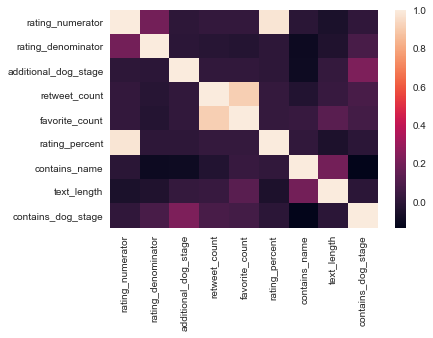

In [196]:
ax = sns.heatmap(tweets_analysis.corr())

There are not many strong correlations in this dataset. Retweet count and favorite count are strongly correlated with each other which isn't all that surprising. Otherwise, the only notable correlation is that between rating numerator and rating percent which is also not surprising.

I also want to take a look at retweet count and favorite count against dog stage and timestamp.

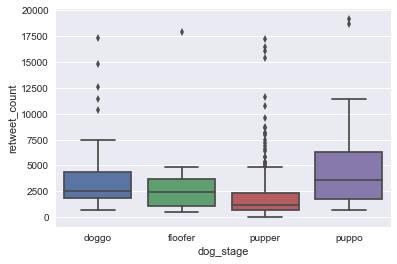

In [208]:
ax = sns.boxplot(x='dog_stage', y='retweet_count',
                    data=tweets_analysis[tweets_analysis.retweet_count < rc_quantile_99])

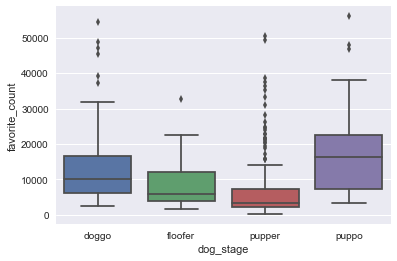

In [209]:
ax = sns.boxplot(x='dog_stage', y='favorite_count',
                    data=tweets_analysis[tweets_analysis.favorite_count < fc_quantile_99])

For both retweet count and favorite count, 'puppo' had the highest counts and 'pupper' had the lowest.

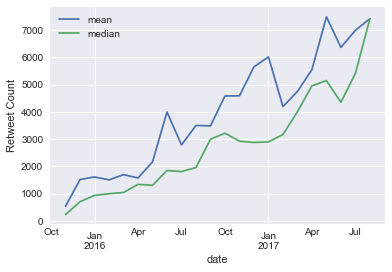

In [236]:
# Create date column without time from timestamp
tweets_analysis['date'] = pd.DatetimeIndex(tweets_analysis.timestamp).normalize()

# Create time series plot for mean and median retweet count by month
rc_ts = pd.Series(tweets_analysis.retweet_count.values, index=tweets_analysis.date)
rc_ts.resample('M').apply(['mean', 'median']).plot()
plt.ylabel('Retweet Count')
plt.show()

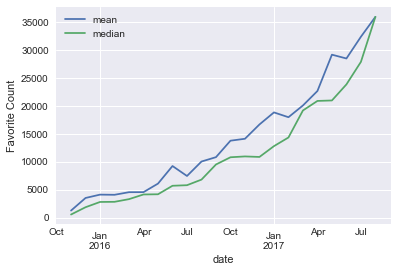

In [237]:
# Create time series plot for mean and median favorite count by month
fc_ts = pd.Series(tweets_analysis.favorite_count.values, index=tweets_analysis.date)
fc_ts.resample('M').apply(['mean', 'median']).plot()
plt.ylabel('Favorite Count')
plt.show()

Both the retweet count and favorite count clearly have been increasing over time. This makes sense as the WeRateDogs Twitter account has gradually gained a significant amount of followers over the past couple years, leading to a greater number of people seeing and interacting with the tweets.

## Multivariate Analysis